In [1]:
import pickle
import matplotlib.pyplot as plt
from collections import Counter

with open('results\\rev2-cold-003-replacement0_to_1225.pickle', 'rb') as handle:
    replacement0_to_1225_003 = pickle.load(handle)
with open('results\\rev2-cold-003-default0_to_1225.pickle', 'rb') as handle:
    default0_to_1225_003 = pickle.load(handle)
with open('results\\rev2-cold-003-insertion0_to_1225.pickle', 'rb') as handle:
    insertion0_to_1225_003 = pickle.load(handle)

with open('results\\rev2-cold-003-replacement1225_to_2450.pickle', 'rb') as handle:
    replacement1225_to_2450_003 = pickle.load(handle)
with open('results\\rev2-cold-003-default1225_to_2450.pickle', 'rb') as handle:
    default1225_to_2450_003 = pickle.load(handle)
with open('results\\rev2-cold-003-insertion1225_to_2450.pickle', 'rb') as handle:
    insertion1225_to_2450_003 = pickle.load(handle)
    
with open('results\\rev2-cold-003-replacement2450_to_3675.pickle', 'rb') as handle:
    replacement2450_to_3675_003 = pickle.load(handle)
with open('results\\rev2-cold-003-default2450_to_3675.pickle', 'rb') as handle:
    default2450_to_3675_003 = pickle.load(handle)
with open('results\\rev2-cold-003-insertion2450_to_3675.pickle', 'rb') as handle:
    insertion2450_to_3675_003 = pickle.load(handle)
    
with open('results\\rev2-cold-003-replacement3675_to_4900.pickle', 'rb') as handle:
    replacement3675_to_4900_003 = pickle.load(handle)
with open('results\\rev2-cold-003-default3675_to_4900.pickle', 'rb') as handle:
    default3675_to_4900_003 = pickle.load(handle)
with open('results\\rev2-cold-003-insertion3675_to_4900.pickle', 'rb') as handle:
    insertion3675_to_4900_003 = pickle.load(handle)

In [2]:
default_lst = [default0_to_1225_003,default1225_to_2450_003,default2450_to_3675_003,default3675_to_4900_003]
default = set().union(*default_lst)
print(len(default))

16


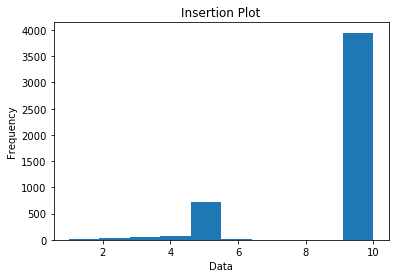

Counter({10: 3949, 5: 712, 4: 76, 3: 56, 2: 39, 1: 19, 6: 9, 8: 3, 7: 3, 9: 2})
4868


In [3]:
insertion = {**insertion0_to_1225_003,**insertion1225_to_2450_003,**insertion2450_to_3675_003,**insertion3675_to_4900_003}
plt.hist([val for val in insertion.values()],bins=10)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Data');
plt.title('Insertion Plot')
plt.show()

counter1 = Counter(insertion.values())
print(counter1)
print(sum(counter1.values()))

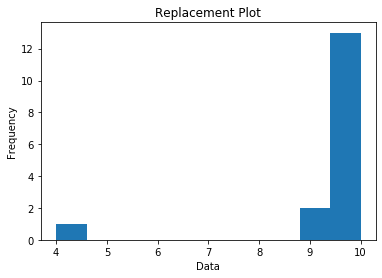

Counter({10: 13, 9: 2, 4: 1})
16


In [4]:
replacement = {**replacement0_to_1225_003,**replacement1225_to_2450_003,**replacement2450_to_3675_003,**replacement3675_to_4900_003}
plt.hist([val for val in replacement.values()],bins=10)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Data');
plt.title('Replacement Plot')
plt.show()

counter2 = Counter(replacement.values())
print(counter2)
print(sum(counter2.values()))

(0, 4000)

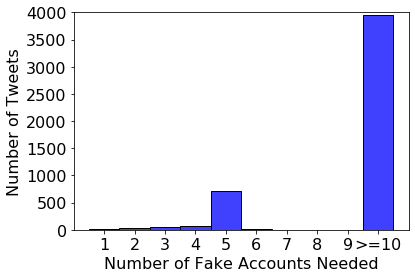

In [5]:
import seaborn as sns
import seaborn as sns
hist = sns.histplot(data=[val for val in insertion.values()],bins=10,color='blue',discrete=True)
hist.set_xlabel("Number of Fake Accounts Needed",fontsize=16)
hist.set_ylabel("Number of Tweets",fontsize=16)
hist.tick_params(labelsize=16)
hist.set_xticks([1,2,3,4,5,6,7,8,9,10]) # <--- set the ticks first
hist.set_xticklabels([1,2,3,4,5,6,7,8,9,">=10"])
hist.set_yticks([0,500,1000,1500,2000,2500,3000,3500,4000]) # <--- set the ticks first
hist.set_yticklabels([0,500,1000,1500,2000,2500,3000,3500,4000])
plt.ylim(0,4000)

(0, 75)

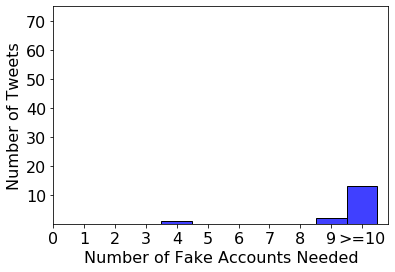

In [6]:
import seaborn as sns
sns.color_palette("tab10")
hist = sns.histplot(data=[val for val in replacement.values()],bins=10,color='blue',discrete=True)
hist.set_xlabel("Number of Fake Accounts Needed",fontsize=16)
hist.set_ylabel("Number of Tweets",fontsize=16)
hist.tick_params(labelsize=16)
hist.set_yticks([10,20,30,40,50,60,70]) # <--- set the ticks first
hist.set_yticklabels([10,20,30,40,50,60,70])
hist.set_xticks([0,1,2,3,4,5,6,7,8,9,10]) # <--- set the ticks first
hist.set_xticklabels([0,1,2,3,4,5,6,7,8,9,">=10"])
plt.ylim(0,75)


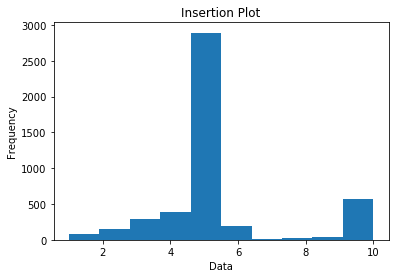

Counter({5: 2891, 10: 574, 4: 391, 3: 287, 6: 197, 2: 153, 1: 84, 9: 44, 8: 21, 7: 15})
4657


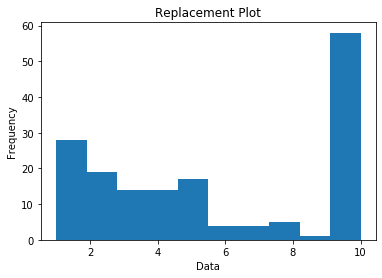

Counter({10: 58, 1: 28, 2: 19, 5: 17, 4: 14, 3: 14, 8: 5, 7: 4, 6: 4, 9: 1})
164


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import random,string
import math
from collections import Counter
from scipy import stats
from collections import defaultdict

notes = pd.read_csv("notes-00000-13-04-21.tsv", sep='\t')
ratings = pd.read_csv("ratings-00000-13-04-21.tsv", sep='\t')

'''def getCurrentlyRatedHelpfulNotesForTweet(ratingsWithNotesForTweet,maxCurrentlyRatedHelpfulNotes = None,minRatingsNeeded = None,minHelpfulnessRatioNeeded = None):
    
    scoredNotes = ratingsWithNotesForTweet.groupby('noteId').sum()
    scoredNotes['helpfulnessRatio'] = scoredNotes['helpful']/scoredNotes['numRatings']
    filteredNotes = scoredNotes[(scoredNotes['numRatings'] >= minRatingsNeeded) & (scoredNotes['helpfulnessRatio'] >= minHelpfulnessRatioNeeded)]
    return filteredNotes.sort_values(by='helpfulnessRatio', ascending=False)[:maxCurrentlyRatedHelpfulNotes]

def findNumberOfAccountsNeeded(ratingsWithNotesForTweet,candidateNotes,currentlyRatedHelpfulNotesIds,insertion=None,replacement=None):
    
    scoredNotes = ratingsWithNotesForTweet.groupby('noteId').sum()
    scoredNotes['helpfulnessRatio'] = scoredNotes['helpful']/scoredNotes['numRatings']

    #For a random note, do a run through of all the possible number of accounts one can use 
    #to rate this note helpful and bring it to "Currently Rated Helpful" (if it is currently not)
      
    randomNoteId = random.choice(list(candidateNotes))
    numberOfAccounts = 1
    timeout = time() + 60*1 
    while(True):

        scoredNotesDummy = scoredNotes.copy(deep=True)
        if insertion:
            #add helpful ratings to random note id
            scoredNotesDummy.loc[randomNoteId, 'helpful'] += numberOfAccounts
            scoredNotesDummy.loc[randomNoteId, 'numRatings'] += numberOfAccounts

        if replacement:
            #at the same time add not helpful to the top 3 notes
            for top3NoteId in currentlyRatedHelpfulNotesIds:
                scoredNotesDummy.loc[top3NoteId, 'numRatings'] += numberOfAccounts
                scoredNotesDummy.loc[top3NoteId, 'notHelpful'] += numberOfAccounts

        scoredNotesDummy['helpfulnessRatio'] = scoredNotesDummy['helpful']/scoredNotesDummy['numRatings']
        filteredNotesAboveThreshold = scoredNotesDummy[(scoredNotesDummy['numRatings'] >= minRatingsNeeded) & (scoredNotesDummy['helpfulnessRatio'] >= minHelpfulnessRatioNeeded)]
        currentlyRatedHelpfulNotesIdsNew = set(filteredNotesAboveThreshold.sort_values(by='helpfulnessRatio', ascending=False)[:maxCurrentlyRatedHelpfulNotes].index)

        #Does our (current note) occur in the currentlyRatedHelpfulNotesIdsNew?
        if randomNoteId in currentlyRatedHelpfulNotesIdsNew:
            return numberOfAccounts

        numberOfAccounts += 1        
        if numberOfAccounts == 10:
            return 10

maxCurrentlyRatedHelpfulNotes = 1
minRatingsNeeded = 5
minHelpfulnessRatioNeeded = 0.84

numberOfAccountsTakenToMakeRandomNoteCurrrentlyRatedHelpful = {}
insertion_bw,replacement_bw = {},{}
default_bw = set()
rem = set()

totalTweets = list(set(notes['tweetId']))
for tweetId in tqdm(totalTweets):
    
    #Get all notes for this tweet
    notesForTweet = notes[notes['tweetId']==tweetId]
    allNotesSet = set(notesForTweet['noteId'])

    #Currently Helpful Notes
    ratingsWithNotesForTweet = notesForTweet.set_index('noteId').join(ratings.set_index('noteId'), lsuffix="_note", rsuffix="_rating", how='left')
    ratingsWithNotesForTweet['numRatings'] = ratingsWithNotesForTweet.apply(lambda x: 0 if math.isnan(x['helpful']) else 1, axis=1)
    currentlyRatedHelpfulNotes = getCurrentlyRatedHelpfulNotesForTweet(ratingsWithNotesForTweet,maxCurrentlyRatedHelpfulNotes = maxCurrentlyRatedHelpfulNotes,minRatingsNeeded = minRatingsNeeded,minHelpfulnessRatioNeeded = minHelpfulnessRatioNeeded)
    currentlyRatedHelpfulNotesIds = set(currentlyRatedHelpfulNotes.index)
   
    #Candidate Notes
    candidateNotes = allNotesSet - currentlyRatedHelpfulNotesIds

    limit = maxCurrentlyRatedHelpfulNotes
    #CASE 1 : If tweet has 3 notes and all 3 are in CRH
    if len(candidateNotes)==0:
        default_bw.add(tweetId)
        continue
        
    #CASE 2 : If tweet has 3 or more notes and only a subset of them in CRH #doubt
    #CASE 3 : If tweet < 3 notes and atleast one note in CRH #doubt
    #CASE 4 : If tweet has 3 or more notes and no note in CRH
    elif len(candidateNotes)>0 and len(currentlyRatedHelpfulNotesIds)<limit:
        insertion_bw[tweetId] = findNumberOfAccountsNeeded(ratingsWithNotesForTweet,candidateNotes,currentlyRatedHelpfulNotesIds,insertion=True,replacement=False)    
        
    #CASE 5 : 
    elif len(allNotesSet)>limit and len(currentlyRatedHelpfulNotesIds)==limit:
        replacement_bw[tweetId] = findNumberOfAccountsNeeded(ratingsWithNotesForTweet,candidateNotes,currentlyRatedHelpfulNotesIds,insertion=True,replacement=True)
        
    else:
        rem.add(tweetId)'''
        
with open('results/bw-insertion.pickle', 'rb') as handle:
    insertion_bw = pickle.load(handle)
with open('results/bw-replacement.pickle', 'rb') as handle:
    replacement_bw = pickle.load(handle)
with open('results/bw-default.pickle', 'rb') as handle:
    default_bw = pickle.load(handle)    

plt.hist([val for val in insertion_bw.values()],bins=10)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Data');
plt.title('Insertion Plot')
plt.show()

counter1 = Counter(insertion_bw.values())
print(counter1)
print(sum(counter1.values()))

plt.hist([val for val in replacement_bw.values()],bins=10)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Data');
plt.title('Replacement Plot')
plt.show()

counter2 = Counter(replacement_bw.values())
print(counter2)
print(sum(counter2.values()))

In [8]:
insertion_common_keys = list(insertion.keys() & insertion_bw.keys())
replacement_common_keys = list(replacement.keys() & replacement_bw.keys())
insertion_bw_analysis = [insertion_bw[key] for key in insertion_common_keys]
insertion_rev2_analysis = [insertion[key] for key in insertion_common_keys]
replacement_bw_analysis = [replacement_bw[key] for key in replacement_common_keys]
replacement_rev2_analysis = [replacement[key] for key in replacement_common_keys]

print(stats.ttest_rel(insertion_rev2_analysis,insertion_bw_analysis,alternative='greater'))
print(stats.ttest_rel(replacement_rev2_analysis,replacement_bw_analysis,alternative='greater'))

Ttest_relResult(statistic=83.5833503057021, pvalue=0.0)
Ttest_relResult(statistic=2.2906920113353593, pvalue=0.019007493210018305)
